In [1]:
from datetime import datetime, timedelta, date
from itertools import product, chain
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb

import numpy as np
import pandas as pd
from constants import *
from pandas_tools import multi_index_add as add
from animated_vaccinations import *
from vaccination import *
import colorsys
pd.set_option("display.max_rows", 999)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
raw, data_date = raw_vaccination_data(sanity_checks=False)
not_complete = ~raw.columns.str.contains('Complete')
by_publish_metrics = raw.columns[raw.columns.str.contains('ByPublishDate') & not_complete]
by_vaccination_metrics = raw.columns[
    raw.columns.str.contains('ByVaccinationDate') & raw.columns.str.startswith('cum') & not_complete
]
metrics = by_publish_metrics.union(by_vaccination_metrics)

In [3]:
for dt in pd.date_range(earliest_vaccination, date.today()-timedelta(days=1)):
    changes = vaccination_changes(dt, exclude_okay=True)
    if changes:
        display(changes)

,,First Dose (New)
,,
Northern Ireland,16 Jan 21,"-20,172"


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Northern Ireland,06 Feb 21,+730,+272,+272


,,Second Dose (New),Complete (New)
,,,
Northern Ireland,21 Feb 21,-11,-11


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Scotland,19 Mar 21,"+25,255","+4,244","+4,244"


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Wales,01 Apr 21,"+16,995","+10,239","+10,239"


,,First Dose (New),Second Dose (New),Complete (New)
,,,,
Wales,03 Apr 21,"+10,558","+2,673","+2,673"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,16 Apr 21,"+14,243","+16,251","+14,243","+14,243","+16,251","+14,243"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Wales,23 Apr 21,"+16,876","+15,833","+16,876","+16,876","+15,833","+16,876"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Scotland,24 Apr 21,"+49,206","+6,552","+49,206","+49,206","+6,552","+49,206"


,,First Dose (New)
,,
Northern Ireland,29 Apr 21,"-8,792"


,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
Northern Ireland,21 Feb 21,+0,+0,+0,+11,+0,+0
Wales,30 Apr 21,"+16,329","+15,932","+16,329","+16,329","+15,932","+16,329"


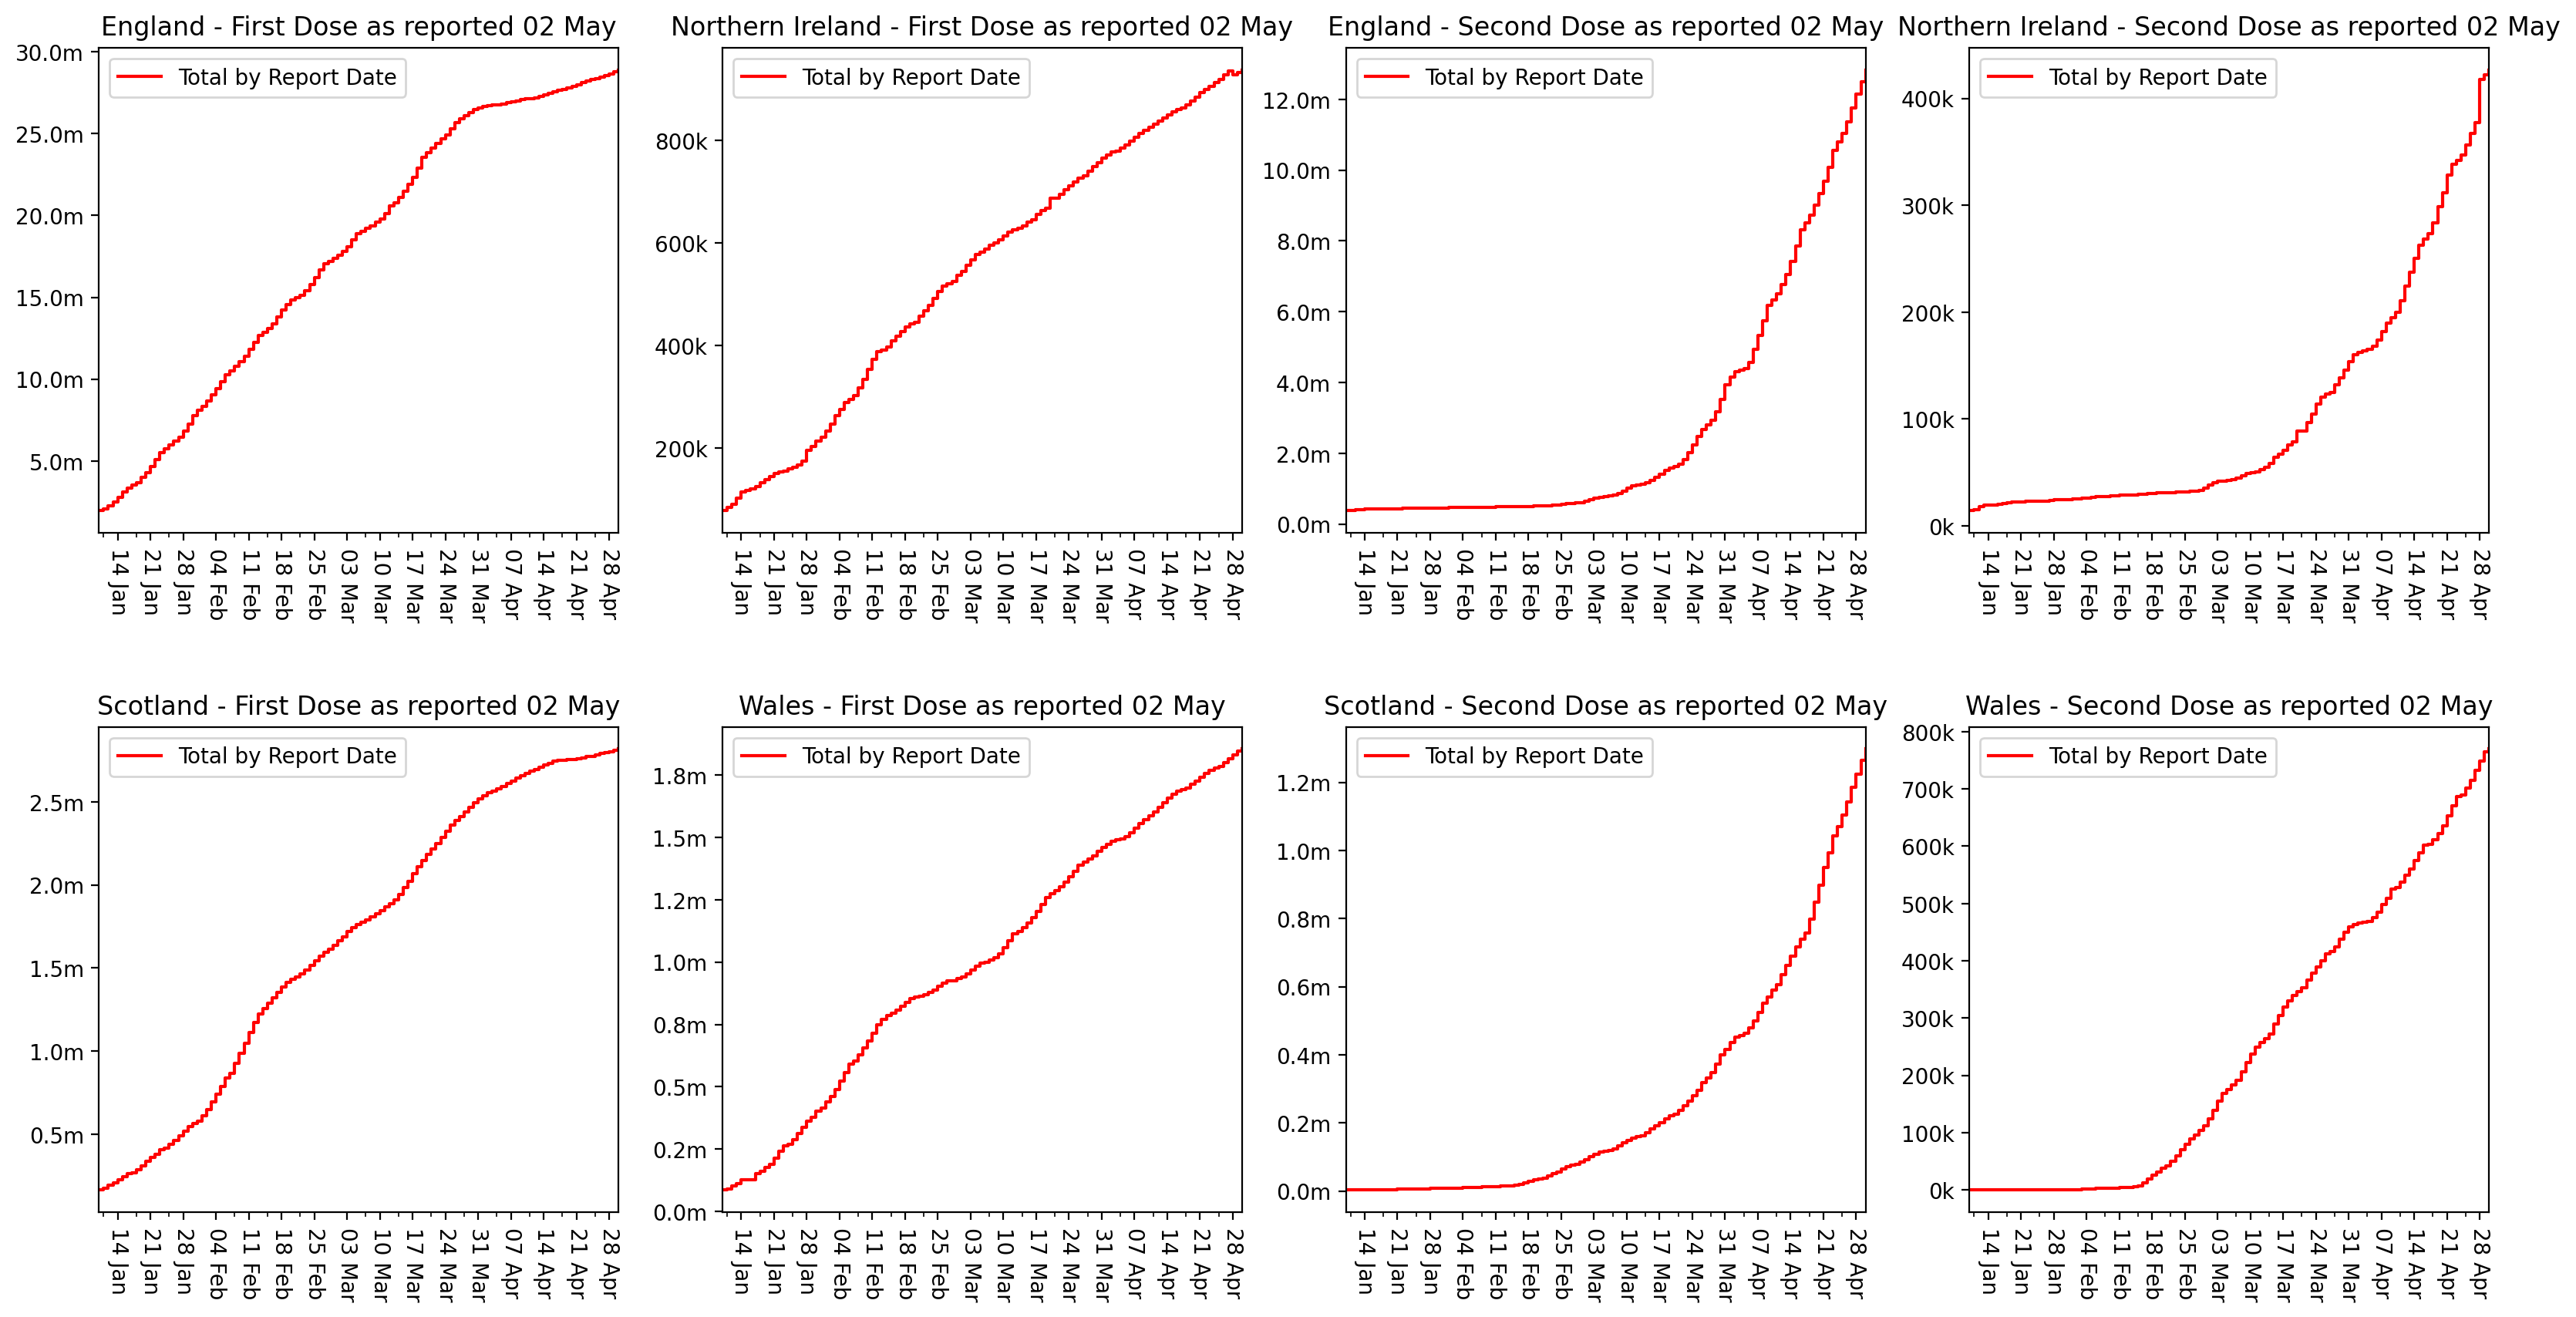

In [4]:
render_plots(selection_mapping()['everything'])